<a href="https://colab.research.google.com/github/kaimakov-rk/kokoko/blob/master/Copy_of_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [103]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

In [104]:
import pandas as pd

df = pd.read_csv('/content/Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [105]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [106]:
# Оставляем только нужные колонки (и меняем тип).

df = df.drop('ID', axis=1)
df = df.astype({'Reached.on.Time_Y.N': bool})
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,True
1,F,Flight,4,5,216,2,low,M,59,3088,True
2,A,Flight,2,2,183,4,low,M,48,3374,True
3,B,Flight,3,3,176,4,medium,M,10,1177,True
4,C,Flight,2,2,184,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,True
10995,B,Ship,4,1,232,5,medium,F,6,1247,False
10996,C,Ship,5,4,242,5,low,F,4,1155,False
10997,F,Ship,5,2,223,6,medium,M,2,1210,False


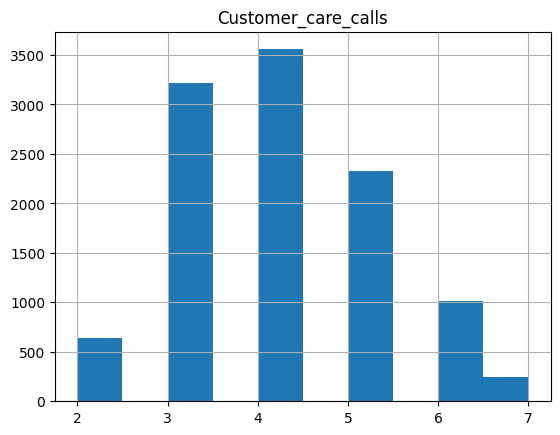

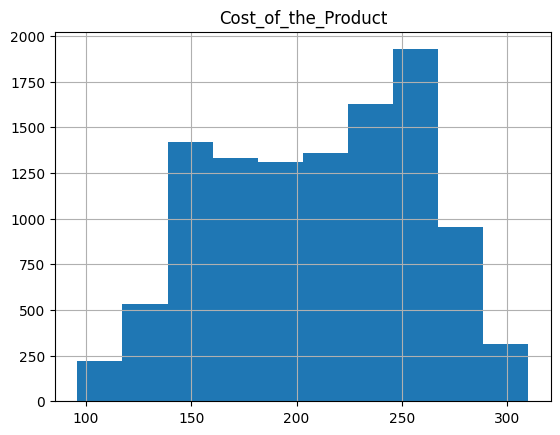

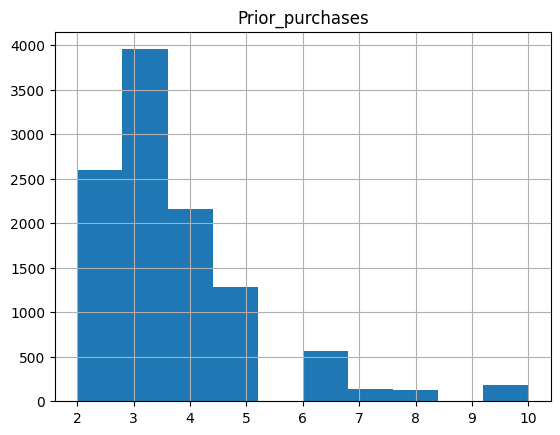

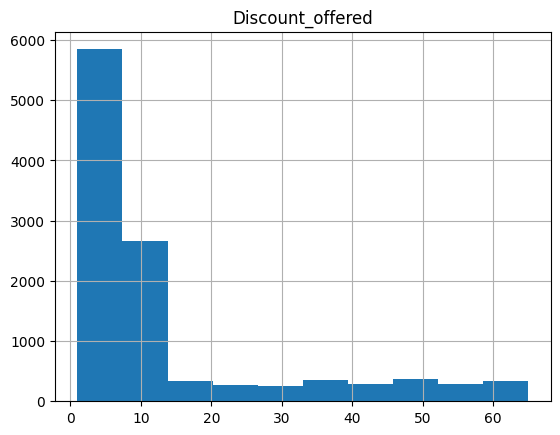

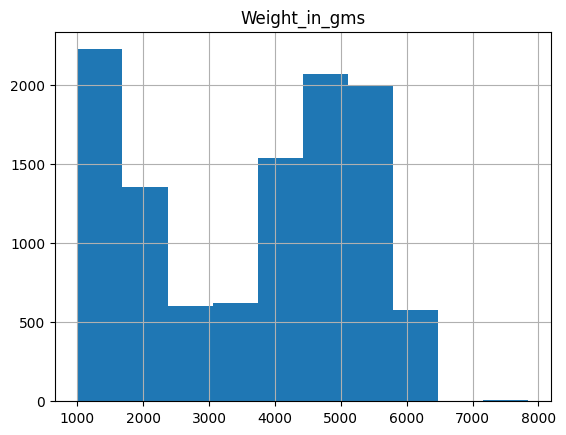

In [107]:
# Ищем выбросы и удаляем пропуски.

df.hist(column='Customer_care_calls');
df.hist(column='Cost_of_the_Product');
df.hist(column='Prior_purchases');
df.hist(column='Discount_offered');
df.hist(column='Weight_in_gms');

In [108]:
df = df.dropna()
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,True
1,F,Flight,4,5,216,2,low,M,59,3088,True
2,A,Flight,2,2,183,4,low,M,48,3374,True
3,B,Flight,3,3,176,4,medium,M,10,1177,True
4,C,Flight,2,2,184,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,True
10995,B,Ship,4,1,232,5,medium,F,6,1247,False
10996,C,Ship,5,4,242,5,low,F,4,1155,False
10997,F,Ship,5,2,223,6,medium,M,2,1210,False


In [109]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [110]:
# Очищаем от выбросов...

from typing import TypeAlias, Text
from copy import deepcopy
from math import erfc
from sklearn.cluster import DBSCAN


DataFrame: TypeAlias = pd.core.frame.DataFrame


class OutlierCleanser:
  def __init__(self, df: DataFrame):
    self.__df = df

  @property
  def df(self):
    return self.__df

  def clean_by_std_and_mean(self, column_name: Text) -> DataFrame:
    result: DataFrame = deepcopy(self.__df)
    mean: float = result[column_name].mean()
    std: float = result[column_name].std()
    return result[result.apply(lambda x: abs(x[column_name] - mean) < 2 * std,
                               axis=1, result_type='reduce')].dropna()

  def clean_by_chauvenet(self, column_name: Text) -> DataFrame:
    result: DataFrame = deepcopy(self.__df)
    iteration: int = 0
    n: int = len(result[column_name])
    while n > 1:
      mean: float = result[column_name].mean()
      std: float = result[column_name].std()
      to_drop: list = list()
      for i, x in enumerate(result[column_name]):
        if std > 0.0 and erfc((abs(x - mean) / 2**0.5) / std) < 1.0/(2*n):
          to_drop += [i, ]
      result = result.drop(to_drop)
      new_n: int = len(result[column_name])
      if new_n < n:
        n = new_n
        iteration += 1
      else:
        return result

  def clean_by_quartiles(self, column_name: Text) -> DataFrame:
    result: DataFrame = deepcopy(self.__df)
    q1: float = result[column_name].quantile(0.25)
    q3: float = result[column_name].quantile(0.75)
    iqr: float = q3 - q1
    result = result[q1 - 1.5 * iqr <= result[column_name]]
    result = result[result[column_name] <= q3 + 1.5 * iqr]
    return result

  def clean_by_2_variables_1_dataframe(self,
                                       column_name_1: Text,
                                       column_name_2: Text) -> DataFrame:
    result: DataFrame = deepcopy(self.__df)
    pairs = list()
    for index, row in result.iterrows():
      pairs.append([row[column_name_1], row[column_name_2]])
    clustering = DBSCAN(eps=2, min_samples=2).fit(pairs)
    outliers = list(filter(lambda ivp: ivp[1] == -1,
                           enumerate(clustering.labels_)))
    return result.drop(map(lambda ivp: ivp[0], outliers))

oc = OutlierCleanser(df)

numeric_columns = ['Customer_care_calls',
                   'Customer_rating',
                   'Cost_of_the_Product',
                   'Prior_purchases',
                   'Discount_offered',
                   'Weight_in_gms']

for col in numeric_columns:
  oc.clean_by_quartiles(col)

df = oc.df.copy()
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,True
1,F,Flight,4,5,216,2,low,M,59,3088,True
2,A,Flight,2,2,183,4,low,M,48,3374,True
3,B,Flight,3,3,176,4,medium,M,10,1177,True
4,C,Flight,2,2,184,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,True
10995,B,Ship,4,1,232,5,medium,F,6,1247,False
10996,C,Ship,5,4,242,5,low,F,4,1155,False
10997,F,Ship,5,2,223,6,medium,M,2,1210,False


In [111]:
df_cluster = df.copy()

# Масштабируем числовые признаки.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

col_names = ['Cost_of_the_Product',
             'Discount_offered',
             'Weight_in_gms']

for name in col_names:
  df_cluster[[name]] = min_max_scaler.fit_transform(df_cluster[[name]])

df_cluster

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,0.378505,3,low,F,0.671875,0.033893,True
1,F,Flight,4,5,0.560748,2,low,M,0.906250,0.304894,True
2,A,Flight,2,2,0.406542,4,low,M,0.734375,0.346676,True
3,B,Flight,3,3,0.373832,4,medium,M,0.140625,0.025712,True
4,C,Flight,2,2,0.411215,3,medium,F,0.703125,0.216654,True
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,0.728972,5,medium,F,0.000000,0.078451,True
10995,B,Ship,4,1,0.635514,5,medium,F,0.078125,0.035939,False
10996,C,Ship,5,4,0.682243,5,low,F,0.046875,0.022498,False
10997,F,Ship,5,2,0.593458,6,medium,M,0.015625,0.030533,False


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

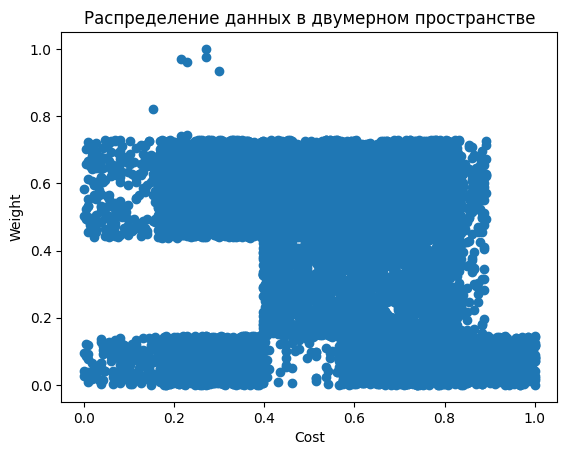

In [112]:
import matplotlib.pyplot as plt

col1 = "Cost_of_the_Product"
col2 = "Weight_in_gms"

plt.scatter(df_cluster[col1], df_cluster[col2])
plt.xlabel('Cost')
plt.ylabel('Weight')
plt.title('Распределение данных в двумерном пространстве')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


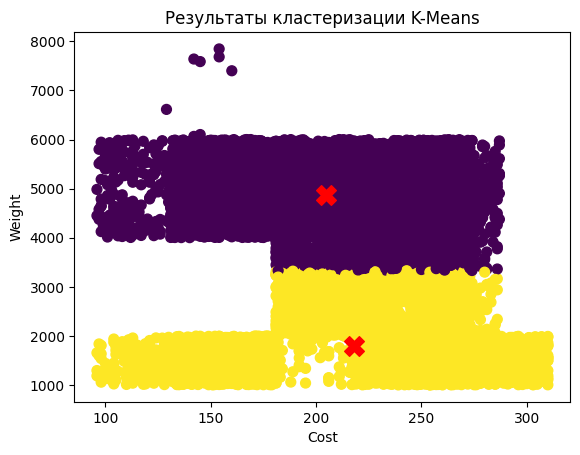

In [119]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(df[[col1, col2]])

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Визуализируем результаты кластеризации
plt.scatter(df[col1], df[col2], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Cost')
plt.ylabel('Weight')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here